# The Sparks Foundation - Internship
GRIP Dec-20

## Name: Ansh Mehta

### Iris Dataset

In [44]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Reading the Iris Data and converting it into DataFrame
df1=pd.read_csv('Iris.csv')
df=pd.DataFrame(df1)

# First 5 rows of the dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
# Last 5 rows of the Dataset
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
# Gathering some info...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
# Describing some info...
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
#Finding the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

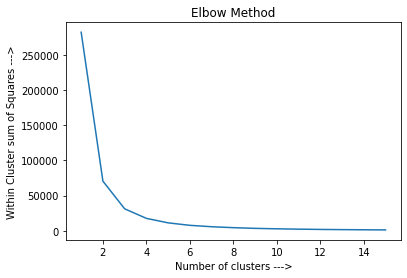

In [51]:
# We will use elbow method (from 1 to 15) to calculate avg score for all clusters.

from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

L1 = []
for i in range(1, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    km.fit(x)
    L1.append(km.inertia_)
    
# Plotting the results onto a line graph, where we can see the elbow (sharp turn)

plt.plot(range(1, 16), L1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters --->')
plt.ylabel('Within Cluster sum of Squares --->') # Within cluster sum of squares
plt.show()

### Here we can see that Avg value where there is a peak(sharp turn) in the graph is 3. Hence, 3 clusters, i.e. K=3 in KMeans

In [52]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

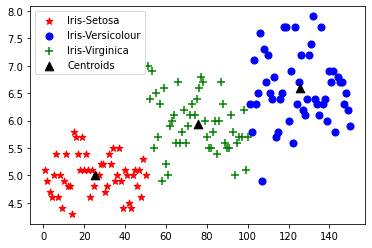

In [53]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-Setosa', marker='*')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-Versicolour', marker='o')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-Virginica', marker='+')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 75,c = 'black', marker="^",label = 'Centroids')
plt.legend(loc='best')

### Here is the graph showing all output clusters 